In [1]:
from scipy.special import comb, perm
from scipy.stats import hypergeom
from scipy.stats import binom
import numpy as np
import pandas as pd
import seaborn as sns;
import matplotlib.pyplot as plt

- First, I want to know the probability of winning.
- Then, I want to know the expectation of winning.
    - Binomial distribution
    - Hypergeometric distribution
    

**Intro**

My friend's company does a walking competition during summer times. Each employee will gain 1 raffle ticket.I want to know how to accumulate my steps in order to gain some stratigic asdvantage for such an event.

**First, I want to know the probability of winning.**

I use following function to model the probability.

```python
def raffle_winning(raffle_have, raffle_total = 708,raffle_pick = 20):
    p=comb(raffle_total - raffle_have, raffle_pick) / comb(raffle_total, raffle_pick)
    return 1 - p
```

Then loop through and plot the result

![pic1](pic1.png)


Although the pct of winning is growing alone with the tickets we have. The increment tend to be smaller each time we gain an extra ticket.
Let's plot the differential as well to test the observation.

![pic2](pic2.png)

As we can see, the differential drops for every single increment. Thus, if our target is to win (not how much we win), holding only 1 ticket has highest win_p/ticket ratio. In other words, the margin benefit of gaining an extra step is getting lower and lower.


- Then, I want to know the expectation of winning.

If we are interested in the amount of winning, it turns out to be a [urn problem](https://en.wikipedia.org/wiki/Urn_problem). 

***Repalcement***
    
I we replace the ticket after we draw from the pool, the total number of raffle as well as the distribution stay the same. Thus, each draw can be treated as independent and identically distributed random variables (**iid**). As a result, the final outcome follows binomial distribution. For Binomial distribution, the expeactation is n * p, p as the probability of success for a single trial (known as Bernoulli distribution). Thus the expactation of winning is proportional to the tickets we hold.

***Non - Repalcement***

It is called Hypergeometric distribution.

- First, I want to know the probability of winning.
- Then, I want to know the expectation of winning.
    - Binomial distribution
    - Hypergeometric distribution
    


https://math.stackexchange.com/questions/91998/probability-of-winning-a-prize-in-a-raffle
https://en.wikipedia.org/wiki/Hypergeometric_distribution

Bernoulli distribution

Binomial distribution

Hypergeometric distribution

Urn Problem

Bernoulli distribution
single trial of Binomial distribution, success is p and fail is 1-p.

Binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments


Independent and identically distributed random variables

In [9]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html

[M, n, N] = [5, 4, 5]#N: Total instances, n: target instances, N: trail counts
p = n / M
rv_hg = hypergeom(M, n, N)
rv_bn = binom(N, p)

x = np.arange(0, N+1)

pmf_hg = rv_hg.pmf(x)

pmf_bn = rv_bn.pmf(x)

pd.DataFrame({'N':x,'pmf_bn':pmf_bn,'pmf_hg':pmf_hg})

,N,pmf_bn,pmf_hg
0,0,0.00032,0.0
1,1,0.00640,0.0
2,2,0.05120,0.0
3,3,0.20480,0.0
4,4,0.40960,1.0
5,5,0.32768,0.0


In [15]:
def build_rvs(M = 708,n = 50,N = 20):
    p = n / M
    rv_hg = hypergeom(M, n, N)
    rv_bn = binom(N, p)

    return (rv_hg, rv_bn)

In [64]:
rv_hg,rv_bn=build_rvs()

In [65]:
a=rv_hg.expect().round(4)
b=rv_bn.expect().round(4)

In [73]:
c=rv_hg.std().round(4)
d=rv_bn.std().round(4)

In [74]:
a==b

True

In [142]:
res=[]
n=700
for i in range(1, n + 1):
    rv_hg, rv_bn = build_rvs(n =  i)
    a=rv_hg.expect().round(4)
    b=rv_bn.expect().round(4)
    c=rv_hg.std().round(4)
    d=rv_bn.std().round(4)
    res.append((i,a,b,c,d))

In [143]:
df=pd.DataFrame(res,columns=['N','hg_exp','bn_exp','hg_std','bn_std'])

In [144]:
df_hg = df[['N','hg_exp','hg_std']].copy()
df_hg['Type']='hg'

df_hg=df_hg.rename(columns={'hg_exp':'exp','hg_std':'std'})

df_bn = df[['N','bn_exp','bn_std']].copy()
df_bn['Type']='bn'
df_bn=df_bn.rename(columns={'bn_exp':'exp','bn_std':'std'})

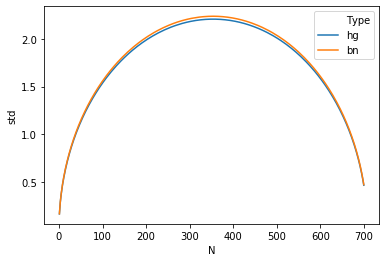

In [146]:
merge_df = pd.concat([df_hg,df_bn])
ax = sns.lineplot(x='N', y='std', data=merge_df,hue='Type')
plt.savefig('books_read.png')

In [112]:
merge_df

,N,Type,bn_exp,bn_std,hg_exp,hg_std
0,1,hg,NaN,NaN,0.0282,0.1657
1,2,hg,NaN,NaN,0.0565,0.2341
2,3,hg,NaN,NaN,0.0847,0.2866
3,4,hg,NaN,NaN,0.1130,0.3307
4,5,hg,NaN,NaN,0.1412,0.3694
...,...,...,...,...,...,...
95,96,bn,2.7119,1.5311,NaN,NaN
96,97,bn,2.7401,1.5378,NaN,NaN
97,98,bn,2.7684,1.5444,NaN,NaN
98,99,bn,2.7966,1.5510,NaN,NaN


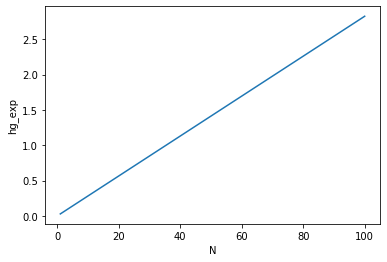

In [100]:
ax = sns.lineplot(x = 'N', y = 'hg_exp', data = df)

In [36]:
rv_bn.std()

0.8944271909999157

In [37]:
rv_hg.std()

0.0

In [115]:
[M, n, N] = [10, 4, 5]#N: Total instances, n: target instances, N: trail counts
p = n / M
rv_hg = hypergeom(M, n, N)
rv_bn = binom(N, p)

x = np.arange(0, N+1)

pmf_hg = rv_hg.pmf(x)

pmf_bn = rv_bn.pmf(x)

In [2]:
def raffle_winning(raffle_have, raffle_total = 708,raffle_pick = 20):
    p=comb(raffle_total - raffle_have, raffle_pick) / comb(raffle_total, raffle_pick)
    return 1 - p

In [3]:
comb(3, 2)

3.0

In [4]:
raffle_winning(50)

0.7736273290621769

In [5]:
res=[]
n=100
for i in range(1,n):
    res.append([i,raffle_winning(i)])


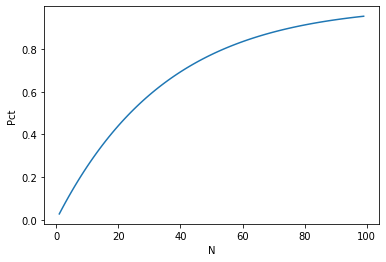

In [7]:
df = pd.DataFrame(res, columns = ['N','Pct'])
ax = sns.lineplot(x = 'N', y = 'Pct', data = df)
plt.savefig('pic1.png')

In [11]:
df['differential']=np.gradient(df.Pct)

In [12]:
df

,N,Pct,differential
0,1,0.028249,0.027489
1,2,0.055738,0.027120
2,3,0.082488,0.026389
3,4,0.108516,0.025677
4,5,0.133843,0.024984
...,...,...,...
94,95,0.946282,0.001781
95,96,0.948035,0.001725
96,97,0.949733,0.001672
97,98,0.951379,0.001620


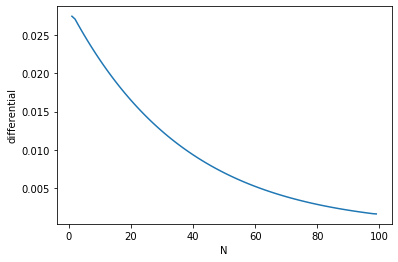

In [14]:
ax = sns.lineplot(x='N', y='differential', data=df)
plt.savefig('pic2.png')

In [27]:
comb(raffle_have,win_cnt)*comb(raffle_total-raffle_have,raffle_pick-win_cnt)/comb(raffle_total,raffle_pick)

NameError: name 'raffle_have' is not defined

In [9]:
comb(raffle_have,win_cnt)

21.0

In [41]:
df[df.N>=17]

,N,Pct
16,17,0.389094
17,18,0.406776
18,19,0.423971
19,20,0.440692
20,21,0.456951
...,...,...
694,695,1.000000
695,696,1.000000
696,697,1.000000
697,698,1.000000


In [10]:
comb(raffle_have,win_cnt)

21.0

In [11]:
comb(raffle_total,win_cnt)

708.0

In [12]:
for i in range(max_win):
    print(i+1)

NameError: name 'max_win' is not defined

In [13]:
def win_prob(win_cnt,raffle_have,raffle_total,raffle_pick):
    return comb(raffle_have,win_cnt)*comb(raffle_total-raffle_have,raffle_pick-win_cnt)/comb(raffle_total,raffle_pick)
    

In [14]:
win_prob(1,5,25,20)*100+win_prob(2,5,25,20)*200+win_prob(3,5,25,20)*300+win_prob(4,5,25,20)*400+win_prob(5,5,25,20)*500

400.0

In [15]:
win_prob(2,5,25,20)

0.0357613401091662

In [16]:
win_prob(3,5,25,20)

0.21456804065499718

In [17]:
win_prob(4,5,25,20)

0.455957086391869

In [18]:
win_prob(5,5,25,20)

0.29181253529079615

In [19]:
def win_exp(raffle_have,raffle_total,raffle_pick=20):
    exp_ret=0
    for i in range(raffle_have):
        exp_ret+=win_prob(i+1,raffle_have,raffle_total,raffle_pick)*(i+1)*100
    return exp_ret

In [20]:
win_exp(5,25)

400.0

In [21]:
res=[]
n=100
for i in range(1,n):
    res.append([i,win_exp(raffle_have=i,raffle_total=1400)])


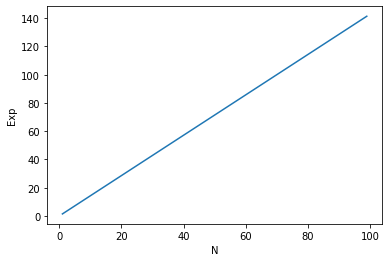

In [22]:
df=pd.DataFrame(res,columns=['N','Exp'])
ax = sns.lineplot(x='N', y='Exp', data=df)

In [25]:
df['diff']=np.gradient(df.Exp)

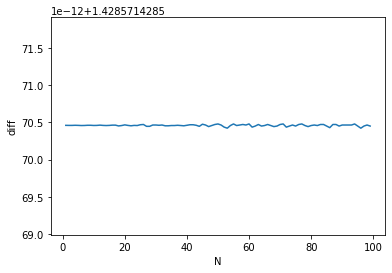

In [26]:

ax = sns.lineplot(x='N', y='diff', data=df)

In [28]:
df

,N,Exp,diff
0,1,1.428571,1.428571
1,2,2.857143,1.428571
2,3,4.285714,1.428571
3,4,5.714286,1.428571
4,5,7.142857,1.428571
...,...,...,...
94,95,135.714286,1.428571
95,96,137.142857,1.428571
96,97,138.571429,1.428571
97,98,140.000000,1.428571


In [92]:
X=0

In [113]:
pmf_hg

array([0.02380952, 0.23809524, 0.47619048, 0.23809524, 0.02380952,
       0.        ])

In [114]:
pmf_bn

array([0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])

In [110]:
pd.DataFrame({'N':x,'pmf_bn':pmf_bn,'pmf_hg':pmf_hg})

,N,pmf_bn,pmf_hg
0,0,0.07776,0.023810
1,1,0.25920,0.238095
2,2,0.34560,0.476190
3,3,0.23040,0.238095
4,4,0.07680,0.023810
5,5,0.01024,0.000000


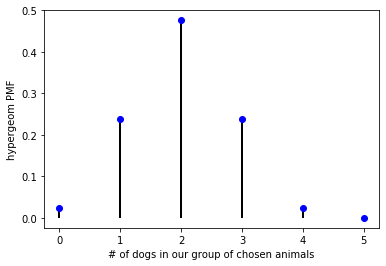

In [88]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(x, pmf_dogs, 'bo')
# ax.vlines(x, 0, pmf_dogs, lw=2)
# ax.set_xlabel('# of dogs in our group of chosen animals')
# ax.set_ylabel('hypergeom PMF')
# plt.show()

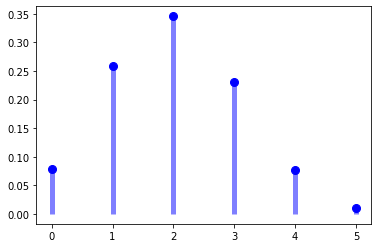

In [89]:
fig, ax = plt.subplots(1, 1)
n, p = 10,
x=
binom.pmf(x, n, p)


In [ ]:
x = np.arange(0,n+1)
ax.plot(x,  binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)

plt.show()